In [1]:
import torch
import torch.optim as optim
from torchsummary import summary
import matplotlib.pyplot as plt
import torch.nn.functional as F

from utils import get_transforms
from utils import download_and_get_data
from model import Net, train, test

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")
device

CUDA Available? False


device(type='cpu')

In [3]:

train_transforms = get_transforms(train=True)
test_transforms = get_transforms(train=False)

In [4]:

train_data = download_and_get_data(train=True)
test_data = download_and_get_data(train=False)

In [5]:

torch.manual_seed(1)
batch_size = 128

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

torch.Size([128, 1, 28, 28]) torch.Size([128])


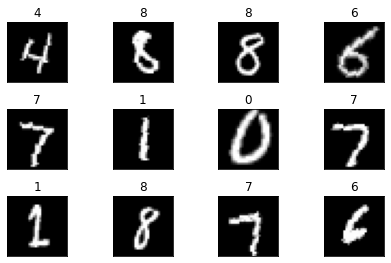

In [6]:


batch_data, batch_label = next(iter(train_loader)) 
print(batch_data.shape,batch_label.shape)
fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [7]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
       BatchNorm2d-2           [-1, 16, 26, 26]              32
            Conv2d-3           [-1, 16, 24, 24]           2,320
       BatchNorm2d-4           [-1, 16, 24, 24]              32
            Conv2d-5           [-1, 16, 22, 22]           2,320
       BatchNorm2d-6           [-1, 16, 22, 22]              32
         MaxPool2d-7           [-1, 16, 11, 11]               0
            Conv2d-8           [-1, 16, 11, 11]             272
       BatchNorm2d-9           [-1, 16, 11, 11]              32
           Conv2d-10             [-1, 16, 9, 9]           2,320
      BatchNorm2d-11             [-1, 16, 9, 9]              32
        Dropout2d-12             [-1, 16, 9, 9]               0
           Conv2d-13             [-1, 16, 7, 7]           2,320
      BatchNorm2d-14             [-1, 1

/home/pratik_jain5/ERA/S6/model.py:66: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [8]:

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
criterion = F.nll_loss
num_epochs = 20

train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion, train_acc, train_losses)
  test(model, device, test_loader, criterion, test_acc, test_losses)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.1565 Batch_id=468 Accuracy=82.00: 100%|██████████| 469/469 [00:52<00:00,  9.00it/s]


Test set: Average loss: 0.0005, Accuracy: 9794/10000 (97.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1723 Batch_id=468 Accuracy=94.73: 100%|██████████| 469/469 [01:08<00:00,  6.82it/s]


Test set: Average loss: 0.0004, Accuracy: 9867/10000 (98.67%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0880 Batch_id=468 Accuracy=95.83: 100%|██████████| 469/469 [01:07<00:00,  6.99it/s]


Test set: Average loss: 0.0003, Accuracy: 9885/10000 (98.85%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1016 Batch_id=468 Accuracy=96.37: 100%|██████████| 469/469 [01:07<00:00,  6.98it/s]


Test set: Average loss: 0.0002, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0454 Batch_id=468 Accuracy=96.85: 100%|██████████| 469/469 [00:57<00:00,  8.22it/s]


Test set: Average loss: 0.0003, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1167 Batch_id=468 Accuracy=97.09: 100%|██████████| 469/469 [01:04<00:00,  7.23it/s]


Test set: Average loss: 0.0002, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0797 Batch_id=468 Accuracy=97.29: 100%|██████████| 469/469 [01:01<00:00,  7.61it/s]


Test set: Average loss: 0.0002, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.1504 Batch_id=468 Accuracy=97.31: 100%|██████████| 469/469 [00:58<00:00,  7.99it/s]


Test set: Average loss: 0.0002, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0427 Batch_id=468 Accuracy=97.53: 100%|██████████| 469/469 [00:58<00:00,  8.08it/s]


Test set: Average loss: 0.0002, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.1948 Batch_id=468 Accuracy=97.55: 100%|██████████| 469/469 [00:58<00:00,  8.07it/s]


Test set: Average loss: 0.0002, Accuracy: 9937/10000 (99.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0433 Batch_id=468 Accuracy=97.69: 100%|██████████| 469/469 [00:59<00:00,  7.95it/s]


Test set: Average loss: 0.0002, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0307 Batch_id=468 Accuracy=97.76: 100%|██████████| 469/469 [00:54<00:00,  8.64it/s]


Test set: Average loss: 0.0002, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0575 Batch_id=468 Accuracy=97.80: 100%|██████████| 469/469 [00:45<00:00, 10.22it/s]


Test set: Average loss: 0.0002, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0739 Batch_id=468 Accuracy=97.86: 100%|██████████| 469/469 [00:43<00:00, 10.67it/s]


Test set: Average loss: 0.0002, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0355 Batch_id=468 Accuracy=97.82: 100%|██████████| 469/469 [00:48<00:00,  9.70it/s]


Test set: Average loss: 0.0002, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.1479 Batch_id=468 Accuracy=98.16: 100%|██████████| 469/469 [00:59<00:00,  7.84it/s]


Test set: Average loss: 0.0001, Accuracy: 9947/10000 (99.47%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0151 Batch_id=468 Accuracy=98.20: 100%|██████████| 469/469 [00:54<00:00,  8.61it/s]


Test set: Average loss: 0.0001, Accuracy: 9950/10000 (99.50%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.1117 Batch_id=468 Accuracy=98.24: 100%|██████████| 469/469 [02:38<00:00,  2.95it/s]


Test set: Average loss: 0.0001, Accuracy: 9951/10000 (99.51%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0971 Batch_id=468 Accuracy=98.32: 100%|██████████| 469/469 [01:28<00:00,  5.32it/s]


Test set: Average loss: 0.0002, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0445 Batch_id=468 Accuracy=98.33: 100%|██████████| 469/469 [03:01<00:00,  2.58it/s]


Test set: Average loss: 0.0001, Accuracy: 9951/10000 (99.51%)

Adjusting learning rate of group 0 to 1.0000e-03.
